# Multi-component reflectance model

In [13]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import frostie.hapke as hapke
import frostie.utils as utils
mpl.rcParams['figure.dpi'] = 100
import os
import copy

Now let's look an example of modelling reflectance of a regolith with two components - water ice and carbon dioxide ice

As in the previous example, we will initialize a `regolith` object

In [6]:
example_two_regolith = hapke.regolith()

Next, we will load the optical constants of the three components

In [7]:
wav_water, n_water, k_water = utils.load_water_op_cons()
wav_co2, n_co2, k_co2 = utils.load_co2_op_cons()

Let's plot these optical constants to get an intuition of how their absorption strength compares to each other 

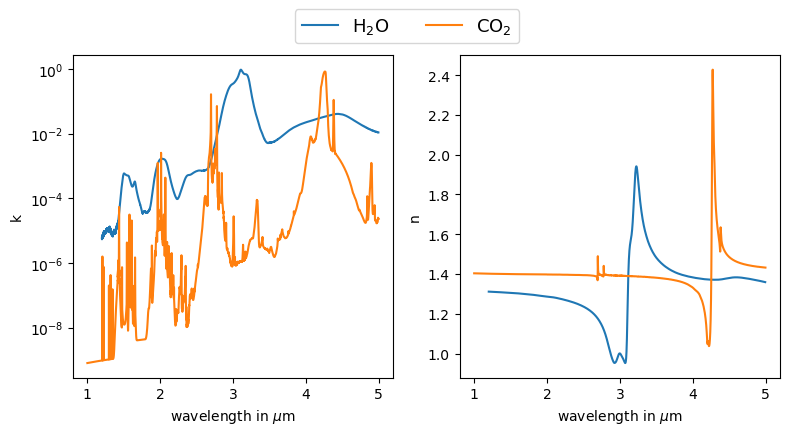

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(wav_water,k_water, label='H$_2$O')
ax[0].plot(wav_co2,k_co2, label='CO$_2$')
ax[0].set_ylabel('k')
ax[0].set_yscale('log')
ax[0].set_xlabel('wavelength in $\mu$m')

ax[1].plot(wav_water,n_water, label='H$_2$O')
ax[1].plot(wav_co2,n_co2, label='CO$_2$')
ax[1].set_ylabel('n')
ax[1].set_xlabel('wavelength in $\mu$m')

# common legend for all subplots

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.515, 1.1), fontsize=13)
plt.tight_layout();

Although CO$_2$ has a rich $k$ spectrum, its at least a couple of orders of magnitude weaker than water's $k$ spectrum in most places.

Let's now add these two components to our `example_two_regolith` object. Since there are multiple components in this regolith, we will need to also provide their abundance fractions as input. We will keep `D` and `p_type`

In [8]:
f = 0.5    # equal abundance (by number) fraction

water = {'name':'water','n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2', 'f':f}
co2 = {'name':'carbon dioxide', 'n':n_co2, 'k':k_co2, 'wav':wav_co2, 'D':100, 'p_type':'HG2', 'f':f}

example_two_regolith.add_components([water, co2], matched_axes=False)

The `matched_axes` flag signals whether the wavelength arrays of the components match. When using the multi-component Hapke model for model-fitting, having the wavelength arrays of the components match before they are added to the `regolith` class helps speed up computation. Since we are only forward modelling now, this pre-processing step is not needed.

Next, we set up the observation geometry, porosity, backscattering and internal-scattering parameters.

In [9]:
example_two_regolith.set_obs_geometry(i=45,e=45,g=90)

example_two_regolith.set_porosity(p=0.9)

example_two_regolith.set_backscattering(B=0)

example_two_regolith.set_s(s=0)

Finally, we need to decide the mixing mode of our components, i.e., whether they are mixed in an `intimate` way (also called salt-and-pepper model) or in a `linear` way (also called 'areal' model), as illustrated below

<img src="intimate_vs_linear.png" width="500" align="middle"/>

Let's choose intimate mixing for now, as modelling the non-linear effects of mixing is the strength of Hapke model

In [10]:
example_two_regolith.set_mixing_mode('intimate')

We are ready to model the reflectance spectrum of `example_two_regolith`!

In [11]:
example_two_regolith.calculate_reflectance()

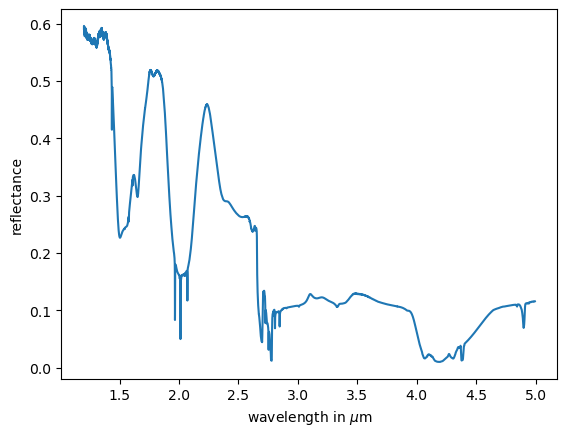

In [12]:
plt.figure()
plt.plot(example_two_regolith.wav_model, example_two_regolith.model)
plt.ylabel('reflectance')
plt.xlabel('wavelength in $\mu$m');

This reflectance spectrum of a water and carbon dioxide mixture is pretty similar to the water ice reflectance spectrum from the previous example, except for sharp absorption features caused by carbon dioxide. This makes sense as water's $k$ spectrum is much stronger compared to carbon dioxide's, so it is expected to dominate the continuum of the mixture spectrum.

Let's also see how the linear mixing model differs from the intimate mixing model above

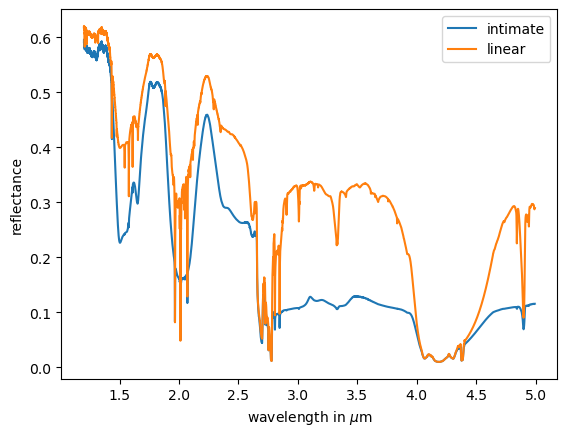

In [14]:
intimate_mix_regolith = copy.deepcopy(example_two_regolith)
linear_mix_regolith = copy.deepcopy(example_two_regolith)

linear_mix_regolith.set_mixing_mode('linear')
linear_mix_regolith.calculate_reflectance()

plt.figure()
plt.plot(intimate_mix_regolith.wav_model, intimate_mix_regolith.model, label='intimate')
plt.plot(linear_mix_regolith.wav_model, linear_mix_regolith.model, label='linear')
plt.ylabel('reflectance')
plt.xlabel('wavelength in $\mu$m')
plt.legend()
